# Part II - Prosper Loan Data Explanatory Visualization
## By: BENJAMIN JUMA


## Investigation Overview

This presentation phase of the project aims at providing the following insights:
1. The distribution of key variables such as borrowers rate, loan original amount, income range as well as monthly loan payment.
2. Relationship between borrowers interest rate and the loan original amount as well as te strenth of the relationship.
3. The relationship  between monthly loan repayment amount, stated onthly income and loan original amount, togather with a visualization depicting the strength of these relationships.
## Dataset Overview

I am using the Prosper Loan Data set. The data set contains 113937 loans with 81 variables on each loan. Some of these variables are loan amount, borrower rate (interest rate), current loan status, borrower income, occupation, recommendation, employments status and many others. Out of these 81 variables, i selected 25 variables which i explored in part one of the exploration phase. After tge exploration phase, i have selected a couple of these variables which i will be using to convey explanatory visuals/presentations. These variables are borrowers rate, loan original amount, stated monthly income, and income range.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
df=pd.read_csv("used_data.csv")
df.head()

CreditGrade  Term LoanStatus  BorrowerAPR  BorrowerRate  LenderYield  \
0           C    36  Completed      0.16516        0.1580       0.1380   
1         NaN    36    Current      0.12016        0.0920       0.0820   
2          HR    36  Completed      0.28269        0.2750       0.2400   
3         NaN    36    Current      0.12528        0.0974       0.0874   
4         NaN    36    Current      0.24614        0.2085       0.1985   

   ProsperRating (numeric) ProsperRating (Alpha)  ProsperScore  \
0                      4.0                     C           NaN   
1                      6.0                     A           7.0   
2                      4.0                   NaN           NaN   
3                      6.0                     A           9.0   
4                      3.0                     D           4.0   

   ListingCategory (numeric)  ... CurrentlyInGroup TotalTrades  \
0                          0  ...             True   11.000000   
1                          2  ...            False   29.000000   
2                          0  ...             True   23.230034   
3                         16  ...            False   26.000000   
4                          2  ...            False   39.000000   

  DebtToIncomeRatio     IncomeRange  IncomeVerifiable  StatedMonthlyIncome  \
0              0.17  $25,000-49,999              True          3083.333333   
1              0.18  $50,000-74,999              True          6125.000000   
2              0.06   Not displayed              True          2083.333333   
3              0.15  $25,000-49,999              True          2875.000000   
4              0.26       $100,000+              True          9583.333333   

   TotalProsperLoans  LoanOriginalAmount MonthlyLoanPayment  Recommendations  
0                NaN                9425             330.43                0  
1                NaN               10000             318.93                0  
2                NaN                3001             123.32                0  
3                NaN               10000             321.45                0  
4                1.0               15000             563.97                0  

[5 rows x 25 columns]

## Visualization 1
How is the distribution of loan original amount, monthly loan payment and income range variables? To address this question, i came up with histograms and a barpot of these three variables as below.

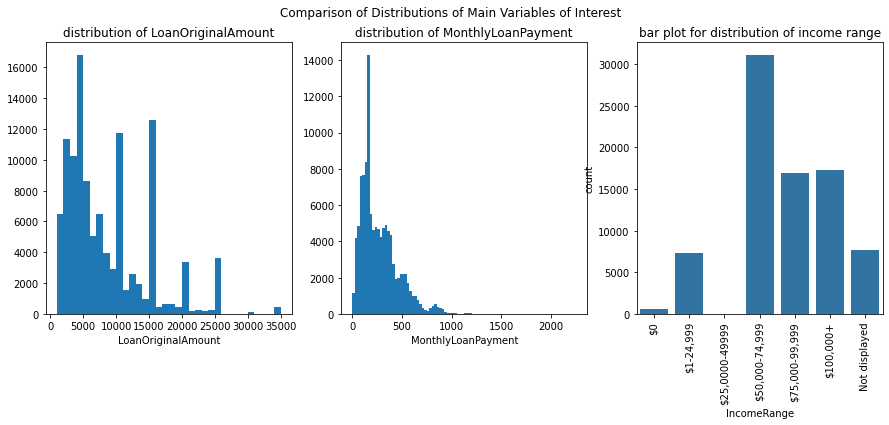

In [3]:
def histogram(x,bins=10, **kwags):
    for column in list(df.columns):
        if column==x:
            bins=np.arange(df[x].min(), df[x].max()+1, bins)
            fig=plt.hist(data=df,x=x,bins=bins)
            plt.xlabel(x)
            plt.title(f"distribution of {x}")
            plt.suptitle("Comparison of Distributions of Main Variables of Interest",fontsize=12);
def barplot():
    sb.countplot(data=df,x='IncomeRange', color=sb.color_palette()[0], order=['$0', '$1-24,999', '$25,0000-49999', '$50,000-74,999','$75,000-99,999','$100,000+', 'Not displayed'])
    plt.title("bar plot for distribution of income range")
    plt.xticks(rotation=90)
    plt.xlabel('IncomeRange')
    #plt.ylabel('count')

#fig.set(xlabel=plt.xlabel(x),title=print(f"histogram for the distributuon of {x} variable"), ylabel="count")
#plt.show()
plt.figure(figsize=[15,5])
plt.subplot(1,3,1)
histogram('LoanOriginalAmount',1000)
plt.subplot(1,3,2)
histogram('MonthlyLoanPayment',25)
plt.subplot(1,3,3)
barplot()

The visualization above depicts the distribution of three main variables of interest in this project. We can see that the distributions of original amount of loan and monthly loan payment are skewed to the right, with some extreme values towards the tail of the distribution.

This skeweness implies that some normalization techniques should be applied in order for the data to have a normal distribution so as to aid in statistcal analysis as normality of data is one of the key assumptions in almost all of statistical analyses. On the other hand, we can see various number of counts accross different categories of the income range variable. WE can see that borrowers with an income range of between $ 25,000$ to  $49,999$ dollars were the majority followed by those with between $50,000$ to $74,999$ dollars.

## Visualization 2
How does the borrower  rate affects the original loan amount given to a borrower?
To answer this question, i visualized the relationship between the two variables using a scatter plot. I also included the regression line in the plot so  as to clearly see the relationship.

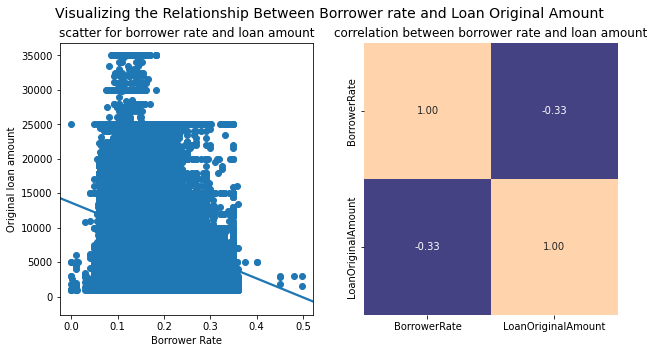

In [4]:
plt.figure(figsize=[10,5])
plt.suptitle('Visualizing the Relationship Between Borrower rate and Loan Original Amount', fontsize=14)
plt.subplot(1,2,1)
sb.regplot(data=df, x='BorrowerRate', y='LoanOriginalAmount', truncate=False,fit_reg=True, scatter_kws={'alpha':1});
plt.title('scatter for borrower rate and loan amount')
plt.xlabel('Borrower Rate')
plt.ylabel('Original loan amount')
plt.subplot(1,2,2)
sb.heatmap(df[['BorrowerRate','LoanOriginalAmount']].corr(), annot=True,fmt='0.2f',cbar=False, center=0);
plt.title('correlation between borrower rate and loan amount');
#cbar=False hides the colorbar from the correlation plot

As can be see from the sactter plot above, there is a negative correlation beetween borrower rate and the original loan amount given to a borrower. We can see that at low rates, original loan amount is high and vive versa. The regression line also confirms this negative relationship. The correlation plot/matrix between the two variables also tell us the strength of the relationship. We can see that the correlation coefficient between borrower rate and loan original amount is -0.33 implying a weak negative linear relationship between the two variables.

## Visualization 3
Is there any correlation between stated monthly income, monthly loan payment and the original loan amount given to a prosper?
To answer this, i first visualized the relationships between these variable using a scatter plot. Thereafter, i came up with a correlation plot which depicts the strength of these relationships.


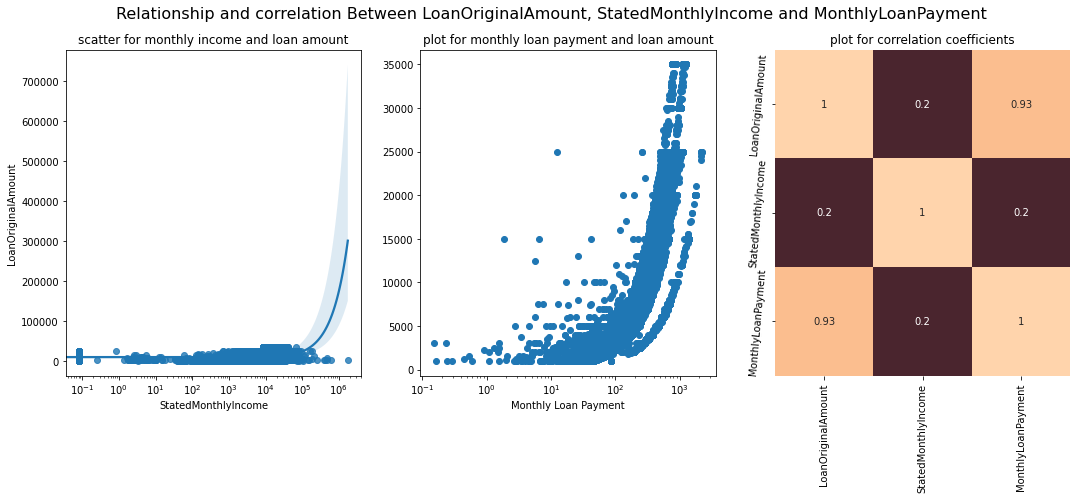

In [19]:
plt.figure(figsize=[18,6])
plt.suptitle('Relationship and correlation Between LoanOriginalAmount, StatedMonthlyIncome and MonthlyLoanPayment', fontsize=16)
plt.subplot(1,3,1)
sb.regplot(data=df, x='StatedMonthlyIncome', y='LoanOriginalAmount', fit_reg=True)
plt.title('scatter for monthly income and loan amount')
plt.xscale('log')
plt.subplot(1,3,2)
plt.scatter(data=df, x='MonthlyLoanPayment', y='LoanOriginalAmount')
plt.title('plot for monthly loan payment and loan amount');
plt.xscale('log')
plt.xlabel('Monthly Loan Payment')
plt.subplot(1,3,3)
sb.heatmap(df[['LoanOriginalAmount','StatedMonthlyIncome','MonthlyLoanPayment']].corr(), annot=True, center=0, cbar=False)
plt.yticks(rotation=85)
plt.title('plot for correlation coefficients');

There is a positive linear correlaton between monthly loan payment, stated monthly payment and loan original amount as depicted in the visulization above. This relationship is confirmed by the correlation matrix above, as we can see the correlation coefficients between each pair of variables. Monthly loan payment is very strongly correlated with loan original amount as it has a correlaton coefficient of 0.93. On the other hand, stated monthly income is somewhat weakly correlated with loan original amount with a correlation cofficient of 0.2. We can then deduce that, monthly income, monthly repayment and borrowers' interest rate are among the key factors that determine the amount of loan given to a prosper.

In [20]:
!jupyter nbconvert Part_II_prosper_loan_data.ipynb --to slides --post serve --no input --no prompt

[NbConvertApp] WARNING | Unrecognized alias: 'no', it will have no effect.
[NbConvertApp] Converting notebook Part_II_prosper_loan_data.ipynb to slides
[NbConvertApp] Writing 684115 bytes to Part_II_prosper_loan_data.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Traceback (most recent call last):
  File "c:\users\triza\appdata\local\programs\python\python39\lib\runpy.py", line 197, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "c:\users\triza\appdata\local\programs\python\python39\lib\runpy.py", line 87, in _run_code
    exec(code, run_globals)
  File "C:\Users\triza\AppData\Local\Programs\Python\Python39\Scripts\jupyter-nbconvert.EXE\__main__.py", line 7, in <module>
  File "c:\users\triza\appdata\local\programs\python\python39\lib\site-packages\jupyter_core\application.py", line 264, in launch_instance
    return super(JupyterApp, cls).launch_instance(argv=argv, **kwargs)
  File "c:\u